# Movielens Case Study

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Input movies dataset
movies = pd.read_csv("C:/Users/had-clu/Desktop/Data-Science-with-Python-Project-One-master/Data science with Python 1/movies.dat",sep="::",names=['MovieID', 'Title', 'Genres'] )

In [3]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.shape

(3883, 3)

In [5]:
#Input ratings dataset
ratings = pd.read_csv("C:/Users/had-clu/Desktop/TCS_BOOT CAMP_Assignments/Project2_tcs_simplilearn/Project2 - data/Data-Science-with-Python-Project-One-master/Data science with Python 1/Data science with Python 1/ratings.dat",sep="::",names=['UserID', 'MovieID', 'Rating', 'Timestamp'] )

In [6]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
#users dataset
users = pd.read_csv("C:/Users/had-clu/Desktop/TCS_BOOT CAMP_Assignments/Project2_tcs_simplilearn/Project2 - data/Data-Science-with-Python-Project-One-master/Data science with Python 1/Data science with Python 1/users.dat",sep="::",names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']  )

In [8]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
#merge two tables at a time and use the primary keys to craete final dataset master_data
ratings_movie = pd.merge(ratings,movies, on=['MovieID'])
ratings_user = pd.merge(ratings,users, on=['UserID'])
Master_Data = pd.merge(ratings_user,ratings_movie,
    on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]

Master_Data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


In [10]:
Master_Data.shape

(1000209, 7)

In [10]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
MovieID       1000209 non-null int64
Title         1000209 non-null object
UserID        1000209 non-null int64
Age           1000209 non-null int64
Gender        1000209 non-null object
Occupation    1000209 non-null int64
Rating        1000209 non-null int64
dtypes: int64(5), object(2)
memory usage: 61.0+ MB


In [12]:
Master_Data.isna().sum()

MovieID       0
Title         0
UserID        0
Age           0
Gender        0
Occupation    0
Rating        0
dtype: int64

In [13]:
Master_Data.duplicated().sum()

0

### Explore the datasets using visual representations (graphs or tables)

<function matplotlib.pyplot.show(*args, **kw)>

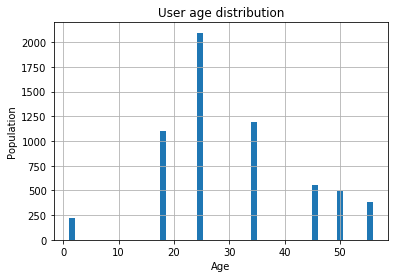

In [14]:
#User age distribution

users['Age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Population')
plt.title("User age distribution")
plt.show

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: MovieID, dtype: int64

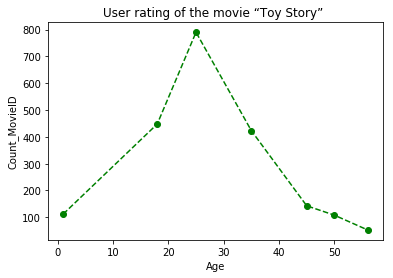

In [15]:
#User rating of the movie “Toy Story”

temp = Master_Data[Master_Data.Title == "Toy Story (1995)"]

plt.plot(temp.groupby("Age")["MovieID"].count(),'--go')
plt.xlabel("Age")
plt.ylabel("Count_MovieID")
plt.title("User rating of the movie “Toy Story” ")
temp.groupby("Age")["MovieID"].count()

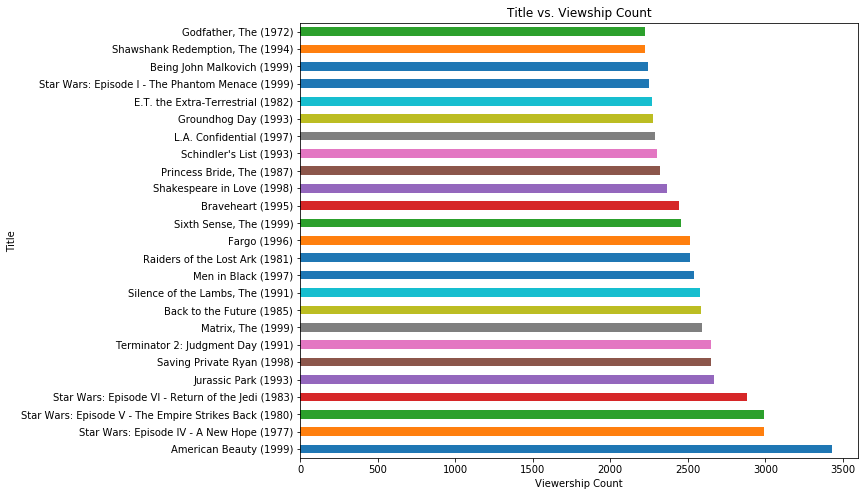

In [16]:
#Top 25 movies by viewership rating

temp = Master_Data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
temp.plot(kind="barh",title='Title vs. Viewship Count',figsize=(10,8))

In [17]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696

temp = Master_Data[Master_Data.UserID == 2696]
temp

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
440667,1258,"Shining, The (1980)",2696,25,M,7,4
440668,1270,Back to the Future (1985),2696,25,M,7,2
440669,1617,L.A. Confidential (1997),2696,25,M,7,4
440670,1625,"Game, The (1997)",2696,25,M,7,4
440671,1644,I Know What You Did Last Summer (1997),2696,25,M,7,2
440672,1645,"Devil's Advocate, The (1997)",2696,25,M,7,4
440673,1805,Wild Things (1998),2696,25,M,7,4
440674,1892,"Perfect Murder, A (1998)",2696,25,M,7,4
440675,800,Lone Star (1996),2696,25,M,7,5
440676,2338,I Still Know What You Did Last Summer (1998),2696,25,M,7,2


### Feature Engineering

In [18]:
#adding column genre in the master_Data and name it as Master_Dataset
Master_Dataset = pd.merge(ratings_user,ratings_movie,
    on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title','Genres', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]
Master_Dataset.head()

,MovieID,Title,Genres,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),Drama,1,1,F,10,5
1,661,James and the Giant Peach (1996),Animation|Children's|Musical,1,1,F,10,3
2,914,My Fair Lady (1964),Musical|Romance,1,1,F,10,3
3,3408,Erin Brockovich (2000),Drama,1,1,F,10,4
4,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy,1,1,F,10,5


In [19]:
Master_Dataset.shape

(1000209, 8)

In [20]:
#find out unique genres
Genres_unique = Master_Dataset['Genres'].str.split("|")


In [21]:
Genres_unique

0                                            [Drama]
1                   [Animation, Children's, Musical]
2                                 [Musical, Romance]
3                                            [Drama]
4                    [Animation, Children's, Comedy]
5               [Action, Adventure, Comedy, Romance]
6                         [Action, Adventure, Drama]
7                                    [Comedy, Drama]
8                   [Animation, Children's, Musical]
9            [Adventure, Children's, Drama, Musical]
10                  [Animation, Children's, Musical]
11                                         [Musical]
12                                           [Drama]
13                                          [Comedy]
14                                         [Musical]
15                                          [Comedy]
16                           [Animation, Children's]
17                           [Animation, Children's]
18                                           [

In [22]:
Genres_list = set()
for genre in Genres_unique:
    Genres_list = Genres_list.union(set(genre))

In [23]:
Genres_list

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [24]:
#create seperate column with one hot encoding
ratingsOneHot = Master_Dataset['Genres'].str.get_dummies("|")


In [25]:
ratingsOneHot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
Master_Dataset = pd.concat([Master_Dataset,ratingsOneHot],axis=1)

In [27]:
Master_Dataset.shape

(1000209, 26)

In [28]:
Master_Dataset.head()

,MovieID,Title,Genres,UserID,Age,Gender,Occupation,Rating,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1193,One Flew Over the Cuckoo's Nest (1975),Drama,1,1,F,10,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,661,James and the Giant Peach (1996),Animation|Children's|Musical,1,1,F,10,3,0,0,...,0,0,0,1,0,0,0,0,0,0
2,914,My Fair Lady (1964),Musical|Romance,1,1,F,10,3,0,0,...,0,0,0,1,0,1,0,0,0,0
3,3408,Erin Brockovich (2000),Drama,1,1,F,10,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy,1,1,F,10,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#Changing categorical values into numerical for column Gender and then change its data type
Master_Dataset['Gender'] = Master_Dataset.Gender.str.replace('F','1')
Master_Dataset['Gender'] = Master_Dataset.Gender.str.replace('M','0')
Master_Dataset['Gender'] = Master_Dataset.Gender.astype(int)
Master_Dataset.head()

,MovieID,Title,Genres,UserID,Age,Gender,Occupation,Rating,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1193,One Flew Over the Cuckoo's Nest (1975),Drama,1,1,1,10,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,661,James and the Giant Peach (1996),Animation|Children's|Musical,1,1,1,10,3,0,0,...,0,0,0,1,0,0,0,0,0,0
2,914,My Fair Lady (1964),Musical|Romance,1,1,1,10,3,0,0,...,0,0,0,1,0,1,0,0,0,0
3,3408,Erin Brockovich (2000),Drama,1,1,1,10,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy,1,1,1,10,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#checking data type of column Gender
Master_Dataset['Gender'].dtype

dtype('int32')

### Build a model

In [31]:
#machine learning libraries
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

In [32]:
Master_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 26 columns):
MovieID        1000209 non-null int64
Title          1000209 non-null object
Genres         1000209 non-null object
UserID         1000209 non-null int64
Age            1000209 non-null int64
Gender         1000209 non-null int32
Occupation     1000209 non-null int64
Rating         1000209 non-null int64
Action         1000209 non-null int64
Adventure      1000209 non-null int64
Animation      1000209 non-null int64
Children's     1000209 non-null int64
Comedy         1000209 non-null int64
Crime          1000209 non-null int64
Documentary    1000209 non-null int64
Drama          1000209 non-null int64
Fantasy        1000209 non-null int64
Film-Noir      1000209 non-null int64
Horror         1000209 non-null int64
Musical        1000209 non-null int64
Mystery        1000209 non-null int64
Romance        1000209 non-null int64
Sci-Fi         1000209 non-null int64
Thriller   

In [33]:
#Use rating as label
labels = Master_Dataset[['Rating']].values

In [34]:
Master_Dataset.drop("Rating",inplace = True, axis = 1)

In [35]:
d1=Master_Dataset.drop(["Title","Genres"],axis = 1) #, inplace = True)

In [36]:
#Create train and test data set
X_train, X_test, y_train, y_test = train_test_split(d1, labels, test_size=0.3, random_state=42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 700146 samples.
Testing set has 300063 samples.


In [37]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# model accuracy for X_test   
accuracy = logreg.score(X_test, y_test) 

#conf_mtx = confusion_matrix(yTest,y_pred)

#acc_log = round(logreg.score(train, train_labels) * 100, 2)
#acc_log

In [38]:
#Logistic Regression
accuracy

0.3483201860942535

In [40]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

#model accuracy
accuracy=random_forest.score(X_test, y_test)


#acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
#acc_random_forest

In [41]:
accuracy

0.3470437874712977

Age, and Occupation are the main features affecting the ratings for the movies